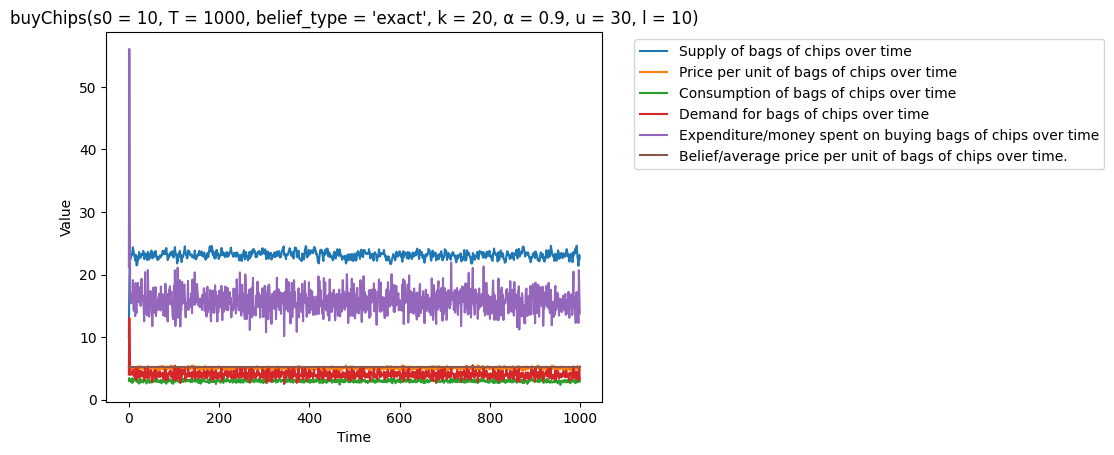

In [3]:
##########################################################################################################################################################
## File:         AX18210_Homework1.ipynb
## Author:       Syed Husain
## Date:         3/3/2023
## E-mail:       ax18210@umbc.edu
## Desciption: Calculates the average of all the variables of buying the chips by the buying agent and plots the average across times
## Course/Section : CMSC 471
##############################################################################################################################################

import random #module to generate random number for price and consumption
import matplotlib.pyplot as plt #module to plot the list across time

def price(): 
    ##Preconditions: None 
    ##Postconditions: Returns random price between 2-8
    return 5 + random.uniform(-3, 3)

def consumption(): 
    ##Preconditions: None 
    ##Postconditions: Returns random choice according to their probability

    prob = random.random() 
    if prob < 0.25: #return 0,1 25% of the time
        return random.choice([0, 1])
    elif prob < 0.75: #return choices 2,3,4 50% of the time
        return random.choice([2, 3, 4])
    else: #else return choice 5,6 25% of time
        return random.choice([5, 6])

def exactAveragePrice(b, pt,p, t, k):
    ##Preconditions: price, p, bt,time and k value
    ##Postconditions: Returns the avg at exact price

    #Uses the formula(6) to calc the average 
    if(t <= k):  
        b[t] = b[t-1] + ( (pt - b[t-1] ) / t)
    elif(t > k):
        b[t] = b[t-1] + ( (pt - p[t - k]) / k)
    return (b[t-1]) #return average at b(t)

def approximateAveragePrice(b, pt, t, k):
    ##Preconditions: price, bt, t and k value
    ##Postconditions: Returns the avg at approximate price

    if(t <= k): #Uses the formula(6) to when t<= to calc approximate price
        b[t] = b[t-1] + ( (pt - b[t-1] ) / t)
    elif(t > k): #change p(t-k) to b(t-1) from the orginial formula(6)
        b[t] = b[t-1] + ( (pt - b[t-1]) / k)
    return (b[t]) #return average at b(t)

def buyChips(s0, T, belief_type, k, α, u, l):
    ##Preconditions: price, time and k value, α, upper limit, lower limit, belief time and initial supply
    ##Postconditions: Calculate s, p, c, b, d, e across run time T

    s, p, c, b, d, e = [], [], [], [], [], [] #declate the list
    st = s0 #intialize st to intial supply

    bt = [0] * (T+1) #Initialize bt with 0
    Pt = [] #list to track all the prices

    #loops from 1 till time T+1
    for t in range(1, T+1):
        pt = price() 
        Pt.append(pt) #appends all the prices for pt
        if t == 1: #if t = 1, then set belief to price
            bt[t] = pt 
        else: #else calc the average price 
            if belief_type == 'exact': #if belief uses the exact formula to calc the average
                bt[t] = exactAveragePrice(bt,pt,Pt,t, k)
            if belief_type == 'approximate': #else uses the approximate formula to calc the average
                bt[t] = approximateAveragePrice(bt,pt, t,k)

        ct = consumption() 
        st = (st - 1) - ct  #calc the st by formula
        if pt <  α * bt[t]: #check if price is less alpha time the belief 
            dt = max(u - st, 0) #if it then set the demand to upper limit minus the supply
        else:
            dt = max(l - st, 0)  #else set the demand to lower limit minus the supply
        st = st + dt 
        et = dt * pt

        #appends all the value in designate list across time T
        s.append(st)
        p.append(pt)
        c.append(ct)
        d.append(dt)
        e.append(et)
        b.append(bt[t])
        
    return s, p, c, b, d, e #returns the list

def create_graph(All_avg):
    ##Preconditions: Require avg value list to be calculated
    ##Postconditions: Create a graph by plotting all the average point across time
    
    #set the label for the graph
    plt.xlabel("Time") 
    plt.ylabel("Value")

    # Plot each list of data as a separate line on the graph
    for i in range(0, len(All_avg)):
        if i == 0:
            plt.plot(All_avg[i],label = "Supply of bags of chips over time")
        if i == 1:
            plt.plot(All_avg[i],label = "Price per unit of bags of chips over time")
        if i == 2:
            plt.plot(All_avg[i],label = "Consumption of bags of chips over time")
        if i == 3:
            plt.plot(All_avg[i],label = "Demand for bags of chips over time")
        if i == 4:
            plt.plot(All_avg[i],label = "Expenditure/money spent on buying bags of chips over time")
        if i == 5:
            plt.plot(All_avg[i],label = "Belief/average price per unit of bags of chips over time.")
            
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #Set the labels outside the plot
    plt.show() #display the plot

def Average_buyChips(s0, T, belief_type, k, α, u, l):
    ##Preconditions: Require all the list values across time
    ##Postconditions: Calculate the average of all the values in list variable across time

    #list to store the average value at each index across time
    sum_s = []
    sum_p = []
    sum_c = []
    sum_d = []
    sum_e = []
    sum_b = []

    #intializes all the index to 0
    for i in range(1000):
        sum_s.append(0)
        sum_p.append(0)
        sum_c.append(0)
        sum_d.append(0)
        sum_e.append(0)
        sum_b.append(0)

    #loops and add all the total value at each index across runs
    for i in range(100):
        s, p, c, b, d, e = buyChips(s0, T, belief_type, k, α, u, l)
        for j in range(1000):
            sum_s[j] += s[j]
            sum_p[j] += p[j]
            sum_c[j] += c[j]
            sum_d[j] += d[j]
            sum_e[j] += e[j]
            sum_b[j] += b[j]
	
    #calculate avg by dividing summation of total val in each index by 100 runs
    average_s = [x / 100 for x in sum_s]
    average_p = [x / 100 for x in sum_p]
    average_c = [x / 100 for x in sum_c]
    average_d = [x / 100 for x in sum_d]
    average_e = [x / 100 for x in sum_e]
    average_b = [x / 100 for x in sum_b]

    All_avg = [] #list with all the sublist of variable from buy chipps

    #appends all the list
    All_avg.append(average_s)
    All_avg.append(average_p)
    All_avg.append(average_c)
    All_avg.append(average_d)
    All_avg.append(average_e)
    All_avg.append(average_b)
    create_graph(All_avg) #calls the function and passes the 2d list to plot each sublist

#a
plt.title("buyChips(s0 = 10, T = 1000, belief_type = 'exact', k = 20, α = 0.9, u = 30, l = 10)") #sets the title
Average_buyChips(s0 = 10, T = 1000, belief_type = 'exact', k = 20, α = 0.9, u = 30, l = 10) #calls the function

(a) Run buyChips(s0 = 10, T = 1000, belief type = ‘exact’, k = 20, α = 0.9, u = 30, l = 10) 100 times and save the output lists s, p, c, b, d, and e 
for each run. Calculate the average of the values in each list across runs. Plot these averages across runs for each list versus time (t = 1, . . . T). 
Interpret the results.  

Ans. From the run, the initial supply is at a low of 10 and then fluctuates between 22-27 indicating that there could be an increasing demand. The price 
fluctuates between 4.4 to 5.6, which indicates that there are some random variables in the market that are affecting the price. Similarly, consumption 
also fluctuates between 2.4 to 3.6, suggesting agent preferences is changing over time based on belief and supply. The belief or average price starts at 
a low 4.7 initially and then fluctuates between 4.85-5.10 over time suggesting that indicating agent is willing to buy more after the initial stage 
leading to an increase in average price. The demand, on the other hand, initially starts at a high 10 and fluctuates between 2-6. This suggests that 
there is high demand at the start but then the market reaches equilibrium. Similarly, expenditure starts at a high 40 and then fluctuates between 22.5-5 
indicating that the agents might be adjusting their spending habits based on the fluctuating prices and supply of the item. Overall, the result suggests 
that there is a relationship between supply, price, demand, and expenditure in the market.

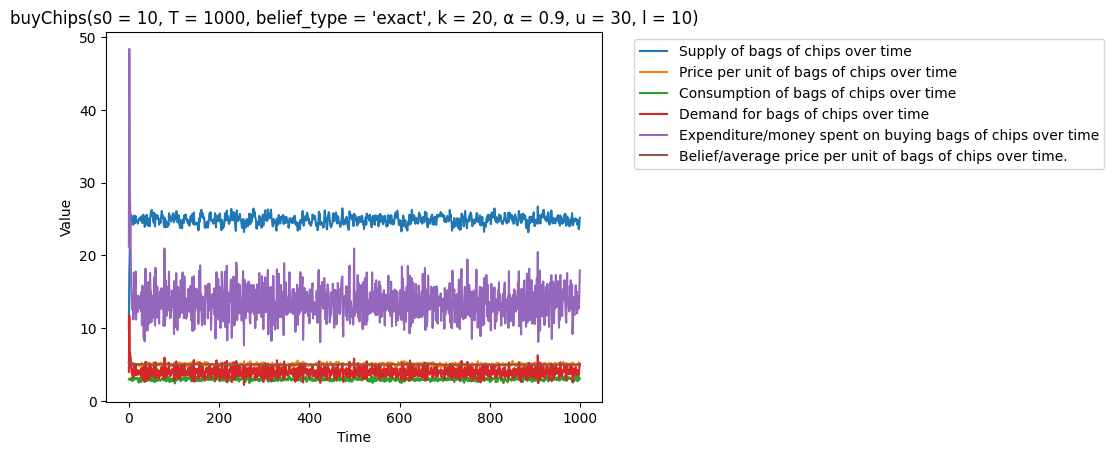

In [4]:
#b 
plt.title("buyChips(s0 = 10, T = 1000, belief_type = 'exact', k = 20, α = 0.9, u = 30, l = 10)")  #sets the title
Average_buyChips(s0 = 10, T = 1000, belief_type = 'approximate', k = 20, α = 0.9, u = 30, l = 10)

(b)Run buyChips(s0 = 10, T = 1000, belief type = ‘approximate’, k = 20, α = 0.9, u = 30, l = 10) 100 times and save the output lists s, p, c, b, d, and e for each run. Calculate the average of the values in each list across runs. Plot these averages across runs for each list versus time (t = 1, . . . T). Interpret the results.  

Ans. From the run, the initial supply is 10 which might be because the agent hasn't started buying it yet and then it fluctuates between 22.5-27.5. 
The price fluctuates between 4.4 to 5.6, which indicates that there are some random variables in the market affecting the price. Similarly, consumption 
also fluctuates between 2.4 to 3.6, suggesting agent preferences is changing over time based on belief and supply. The belief or average price starts at 
a high of 5.15 and then goes low and fluctuates between 5.08 and 4.90 over time. This suggests that the agent is willing to buy less after the initial 
stage leading to a decreased average price. The demand, on the other hand, initially starts at a high of 10 in the initial stages and fluctuates between 
2.5-6.5. This suggests that there is high demand at the start but then the market reaches equilibrium. Similarly, expenditure starts at a high 45 and 
then fluctuates between 22.5-5 indicating that the agents might be adjusting their spending habits based on the fluctuating prices and supply of the item. Overall, the result suggests that there is a relationship between supply, price, demand, and expenditure in the market.

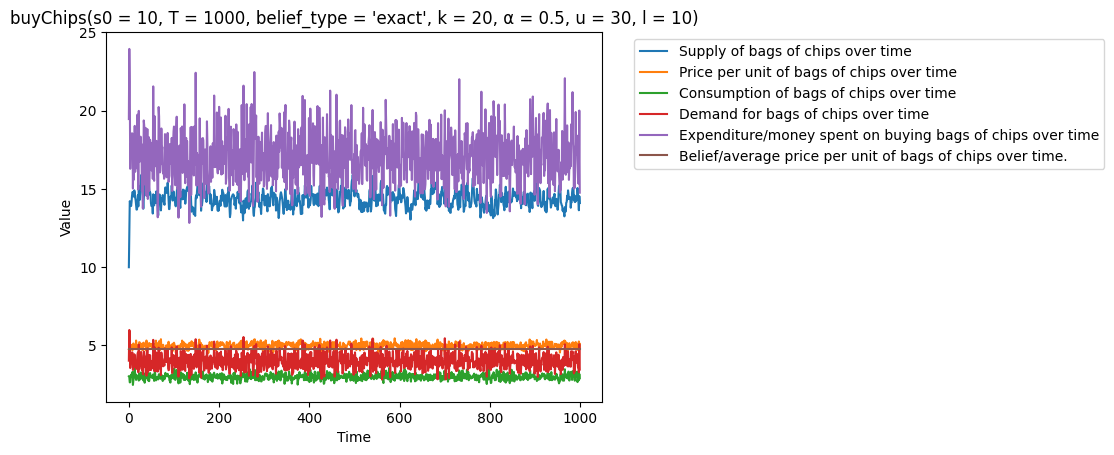

In [5]:
#c
plt.title("buyChips(s0 = 10, T = 1000, belief_type = 'exact', k = 20, α = 0.5, u = 30, l = 10)")  #sets the title
Average_buyChips(s0 = 10, T = 1000, belief_type = 'exact', k = 20, α = 0.5, u = 30, l = 10)

(c) Run buyChips(s0 = 10, T = 1000, belief type = ‘exact’, k = 20, α = 0.5, u = 30, l = 10) 100 times and save the output lists s, p, c, b, d, and e 
for each run. Calculate the average of the values in each list across runs. Plot these averages across runs for each list versus time (t = 1, . . . T). 
Interpret the results.

Ans. From the run, the initial supply is 10 which might be because the agent hasn't started buying it yet and then it fluctuates between 12.25-16. 
The price fluctuates between 4.4 to 5.6, which indicates that there are some random variables in the market affecting the price. Similarly, consumption 
also fluctuates between 2.4 to 3.6, suggesting agent preferences is changing over time based on belief and supply. The belief or average price starts at 
a low of almost 0 and then goes high and fluctuates between 5.10 and 4.8 over time. This suggests that there is no demand, in the beginning, leading to 
a zero average price but then it catches as the demand starts to grow.  The demand, on the other hand, fluctuates between 2.5-6. This suggests that the 
demand is around equilibrium with some fluctuations. Similarly, expenditure starts at a high 45 and then fluctuates between 12-22 indicating that the 
agents might be adjusting their spending habits based on the fluctuating prices and supply of the item. Overall, the result suggests that there is a 
relationship between supply, price, demand, and expenditure in the market.

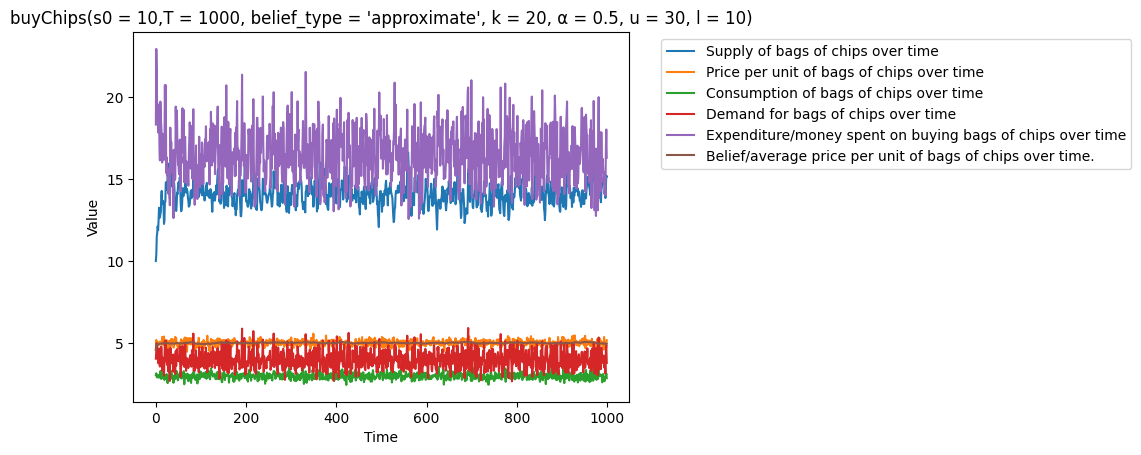

In [6]:
#d
plt.title("buyChips(s0 = 10,T = 1000, belief_type = 'approximate', k = 20, α = 0.5, u = 30, l = 10)")  #sets the title
Average_buyChips(s0 = 10,T = 1000, belief_type = 'approximate', k = 20, α = 0.5, u = 30, l = 10)

(d) Run buyChips(s0 = 10, T = 1000, belief type = ‘approximate’, k = 20, α = 0.5, u = 30, l = 10) 100 times and save the output lists s, p, c, b, d, and 
#e for each run. Calculate the average of the values in each list across runs. Plot these averages across runs for each list versus time (t = 1, . . . T). Interpret the results.

Ans. From the run, the initial supply is 10 which might be because the agent hasn't started buying it yet and then it fluctuates between 12-17. The price fluctuates between 4.4 to 5.6, which indicates that there are some random variables in the market affecting the price. Similarly, consumption also 
fluctuates between 2.4 to 3.6, suggesting that demand is also changing over time. The belief or average price starts at a low of 4.7 and then goes high 
and fluctuates between 4.92-5.07 over time. This suggests that there is less demand in the beginning, but then the demand grows and thus leading to a 
higher average price.  The demand, on the other hand,  fluctuates between 2.5-6 suggesting it is around the equilibrium. Similarly, expenditure fluctuates between 12-22 indicating that the agents might be adjusting their spending habits based on the fluctuating prices and supply of the item. Overall, the result suggests that there is a relationship between supply, price, demand, and expenditure in the market.

Overall, across all 4 runs, the price and consumption remain the same. Whereas, the average price, demand, and expenditure vary across the runs 
comparatively.

(e) How do α and belief type affect the different output variables averaged across runs? Answer this by comparing the results from 4a-4d. 

Ans. By comparing the results from 4a-4d, we find that the larger the value of α and the belief_type is, the higher the demand, supply, and expenditure 
would be with huge spikes. Whereas whenever the α and the belief_type are low, all three variables that is demand, supply, and expenditure just have 
minor fluctuations with no huge spikes in comparison to when α and the belief_type are high.